In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


## Objective:
    Develop an algorithm to predict fraud. Prioritize correctly finding fraud rather than correctly labeling non-fraudulent    transactions.

In [8]:
raw_data = pd.read_csv(r'C:\Users\chase\Anaconda3\Database_Dictionary\Kaggle\creditcard.csv')
raw_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [10]:
raw_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

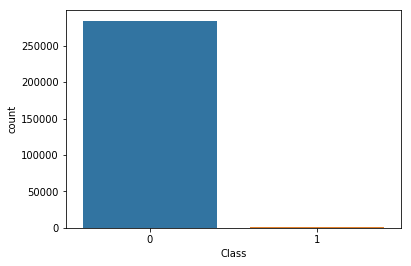

In [18]:
sns.countplot(x="Class", data=raw_data)

The data has no null values, but is very unbalanced.  We have 492 fraudulent purchases to 284315 non-fraudulent purchases.  If we were to create a predictive model with the entire dataset it would surely overfit.  Because I am most concerned with correctly identifying fraudulent purchases versus correctly identifying non-fraudulent purchases I will cut down my training set to 50% fraudulent cases to 50% non-fraudulent cases.  

In [46]:
fraud = raw_data[raw_data['Class'] == 1]

nonfraud = raw_data[raw_data['Class'] == 0].sample(n=492)

test = pd.concat([fraud, nonfraud])

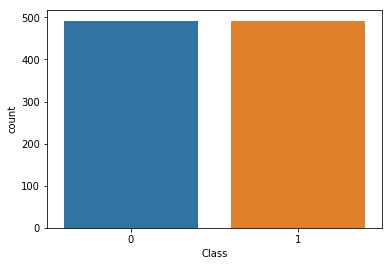

In [48]:
sns.countplot(test.Class)

Equal sized classes will combat overfitting.   

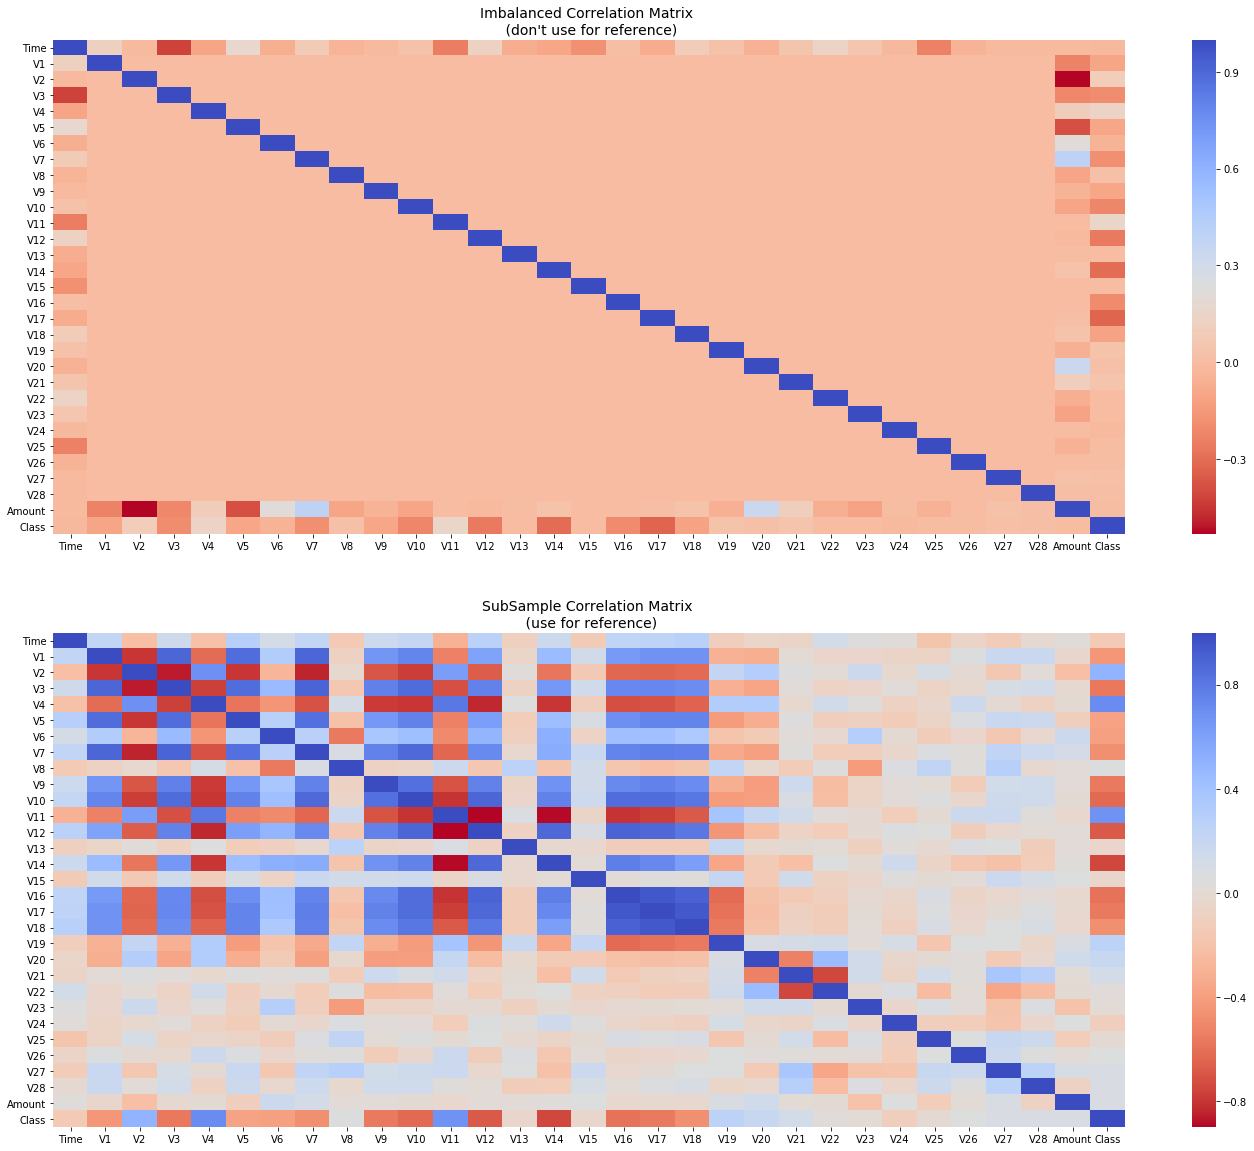

In [49]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = raw_data.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = test.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [59]:
Xtrain = test.drop('Class', 1)

Ytrain = test.Class

Xtest = raw_data.drop('Class', 1)

Ytest = raw_data.Class

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(Xtrain, Ytrain)

rfc.score(Xtrain, Ytrain)

0.991869918699187

In [69]:
from sklearn.model_selection import cross_val_score

cross_val_score(rfc, Xtrain, Ytrain, cv=10)

array([0.95      , 0.95      , 0.94897959, 0.87755102, 0.89795918,
       0.93877551, 0.96938776, 0.91836735, 0.93877551, 0.86734694])

In [67]:
X = rfc.predict(Xtest)

In [74]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Ytest, X)

array([[277695,   6620],
       [     8,    484]], dtype=int64)

In [71]:
X.shape

(284807,)

In [72]:
Ytest.shape

(284807,)

In [75]:
484 / (484 +8 )

0.983739837398374

We have a 98% accurate model after balancing the data and applying a Random Forest Classifier.  We could reduce the features to the most important features if we wanted a quicker model as well.  